In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import json
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Geetansh/Data Literacy/sentiment-ChatGPT/data/tweets_1.4.csv")
pd.set_option('display.max_colwidth', None)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head(5)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Tim Julian Ruster,I asked ChatGPT about one of the most incredible facts about the universe.... 🤩\n\n#ChatGPT https://t.co/K4CCqS3qSX,"Köln, Deutschland","Space-YouTuber, Autor und Planetariumsführer\n\nIch tweete hauptsächlich über Astronomie, Wissenschaft und ab und zu über #Bitcoin!",2015-06-14 08:35:03+00:00,11512.0,24.0,2635.0,False,2022-12-18 17:48:20+00:00,['ChatGPT'],Twitter Web App
1,Jessica Cavallaro,Watch The #Agile Teachers Lounge &amp; join the conversation about #ChatGPT in the #classroom. \n\nJoin the conversation and let us know your thoughts! \n\nhttps://t.co/jBK0E8lo0u\n\n#edutwitter #edchat https://t.co/E7aEybs9nK,"Delray Beach, FL","Educational Agilist, #Teacher, #History Lover, Mom, #Runner, Book Worm",2015-10-02 13:23:34+00:00,372.0,685.0,2684.0,False,2022-12-18 17:48:12+00:00,"['Agile', 'ChatGPT', 'classroom']",Twitter for iPhone
2,Heart Selling,"What is Heart Selling according to #ChatGPT.\nNot bad, though a little long but pretty complete and accurate \n#heartselling #ai #makefriends https://t.co/pntaNOTFOq","Zeist, Nederland",In turbulent times: Make #friends! De Sales Experts voor Menselijk Verkopen (Sinds 1998) #makefriends #loveresults,2010-12-17 13:06:12+00:00,42.0,8.0,78.0,False,2022-12-18 17:48:12+00:00,['ChatGPT'],Twitter for Android
3,CryptoRock,"@sulamatraore You should thanks to check out this website, https://t.co/GIN65QfmQy which has a great collection of preselected money-making prompts that can be easily copied and pasted into #ChatGPT to generate income",NaN,💯💯💯💯 Follow Black 💯💯💯💯,2022-06-29 08:37:05+00:00,835.0,964.0,193.0,False,2022-12-18 17:48:10+00:00,NaN,Twitter Web App
4,Octo_Fam💫,@OpenAI is anything real or original anymore?\n#ChatGPT #AIArtwork \nYay or nay ?,Coast of somewhere beautiful,#ProjectOctolite👾 #ShineYourLite✨️#Curating #NftArt 🎨 \n#NftCommunity🫂\n#Octolites👾\n#irlgallery\n https://t.co/6ErQGgnHit\n#SpacesHost,2021-11-16 16:03:30+00:00,1280.0,2494.0,13932.0,False,2022-12-18 17:48:09+00:00,"['ChatGPT', 'AIArtwork']",Twitter for Android


In [5]:
df.shape

(84568, 12)

In [6]:
df.keys()

Index(['user_name', 'text', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'hashtags', 'source'],
      dtype='object')

In [7]:
stoplist = set(stopwords.words("english"))
stoplist.remove('not')

In [8]:
df['text'] = df['text'].fillna('').apply(str)

In [9]:
def preprocess_text(df):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    df["processed_text"] = df["text"].apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
    df["processed_text"] = df["processed_text"].apply(lambda x: re.sub(r'@\S+', '', x))
    df["processed_text"] = df["processed_text"].apply(lambda x: x.lower())
    df["processed_text"] = df["processed_text"].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    df["processed_text"] = df["processed_text"].apply(lambda x: word_tokenize(x))
    df["processed_text"] = df["processed_text"].apply(lambda x: [word for word in x if word not in stoplist])
    return df

In [10]:
processed_df = preprocess_text(df)

In [11]:
processed_df.head(5)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text
0,Tim Julian Ruster,I asked ChatGPT about one of the most incredible facts about the universe.... 🤩\n\n#ChatGPT https://t.co/K4CCqS3qSX,"Köln, Deutschland","Space-YouTuber, Autor und Planetariumsführer\n\nIch tweete hauptsächlich über Astronomie, Wissenschaft und ab und zu über #Bitcoin!",2015-06-14 08:35:03+00:00,11512.0,24.0,2635.0,False,2022-12-18 17:48:20+00:00,['ChatGPT'],Twitter Web App,"[asked, chatgpt, one, incredible, facts, universe, chatgpt]"
1,Jessica Cavallaro,Watch The #Agile Teachers Lounge &amp; join the conversation about #ChatGPT in the #classroom. \n\nJoin the conversation and let us know your thoughts! \n\nhttps://t.co/jBK0E8lo0u\n\n#edutwitter #edchat https://t.co/E7aEybs9nK,"Delray Beach, FL","Educational Agilist, #Teacher, #History Lover, Mom, #Runner, Book Worm",2015-10-02 13:23:34+00:00,372.0,685.0,2684.0,False,2022-12-18 17:48:12+00:00,"['Agile', 'ChatGPT', 'classroom']",Twitter for iPhone,"[watch, agile, teachers, lounge, amp, join, conversation, chatgpt, classroom, join, conversation, let, us, know, thoughts, edutwitter, edchat]"
2,Heart Selling,"What is Heart Selling according to #ChatGPT.\nNot bad, though a little long but pretty complete and accurate \n#heartselling #ai #makefriends https://t.co/pntaNOTFOq","Zeist, Nederland",In turbulent times: Make #friends! De Sales Experts voor Menselijk Verkopen (Sinds 1998) #makefriends #loveresults,2010-12-17 13:06:12+00:00,42.0,8.0,78.0,False,2022-12-18 17:48:12+00:00,['ChatGPT'],Twitter for Android,"[heart, selling, according, chatgpt, not, bad, though, little, long, pretty, complete, accurate, heartselling, ai, makefriends]"
3,CryptoRock,"@sulamatraore You should thanks to check out this website, https://t.co/GIN65QfmQy which has a great collection of preselected money-making prompts that can be easily copied and pasted into #ChatGPT to generate income",NaN,💯💯💯💯 Follow Black 💯💯💯💯,2022-06-29 08:37:05+00:00,835.0,964.0,193.0,False,2022-12-18 17:48:10+00:00,NaN,Twitter Web App,"[thanks, check, website, great, collection, preselected, moneymaking, prompts, easily, copied, pasted, chatgpt, generate, income]"
4,Octo_Fam💫,@OpenAI is anything real or original anymore?\n#ChatGPT #AIArtwork \nYay or nay ?,Coast of somewhere beautiful,#ProjectOctolite👾 #ShineYourLite✨️#Curating #NftArt 🎨 \n#NftCommunity🫂\n#Octolites👾\n#irlgallery\n https://t.co/6ErQGgnHit\n#SpacesHost,2021-11-16 16:03:30+00:00,1280.0,2494.0,13932.0,False,2022-12-18 17:48:09+00:00,"['ChatGPT', 'AIArtwork']",Twitter for Android,"[anything, real, original, anymore, chatgpt, aiartwork, yay, nay]"


In [12]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.5 MB/s eta 0:00:00


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Add the new columns to the DataFrame
processed_df['sentiment_label'] = ''
processed_df['sentiment_score'] = 0.0

# Loop through the rows of the DataFrame
for index, row in processed_df.iterrows():
    # Get the text of the tweet
    text = row['text']
    # Use the analyzer to get the sentiment scores
    sentiment = analyzer.polarity_scores(text)
    # Update the new columns with the sentiment values
    processed_df.at[index, 'sentiment_score'] = sentiment['compound']
    if sentiment['compound'] >= 0.05:
        processed_df.at[index, 'sentiment_score'] = sentiment['compound']
        processed_df.at[index, 'sentiment_label'] = "POSITIVE"
    elif sentiment['compound'] <= -0.05:
        processed_df.at[index, 'sentiment_score'] = sentiment['compound']
        processed_df.at[index, 'sentiment_label'] = "NEGATIVE"
    else:
        processed_df.at[index, 'sentiment_score'] = sentiment['compound']
        processed_df.at[index, 'sentiment_label'] = "NEUTRAL"

In [14]:
processed_df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text,sentiment_label,sentiment_score
0,Tim Julian Ruster,I asked ChatGPT about one of the most incredible facts about the universe.... 🤩\n\n#ChatGPT https://t.co/K4CCqS3qSX,"Köln, Deutschland","Space-YouTuber, Autor und Planetariumsführer\n\nIch tweete hauptsächlich über Astronomie, Wissenschaft und ab und zu über #Bitcoin!",2015-06-14 08:35:03+00:00,11512.0,24.0,2635.0,False,2022-12-18 17:48:20+00:00,['ChatGPT'],Twitter Web App,"[asked, chatgpt, one, incredible, facts, universe, chatgpt]",NEUTRAL,0.0000
1,Jessica Cavallaro,Watch The #Agile Teachers Lounge &amp; join the conversation about #ChatGPT in the #classroom. \n\nJoin the conversation and let us know your thoughts! \n\nhttps://t.co/jBK0E8lo0u\n\n#edutwitter #edchat https://t.co/E7aEybs9nK,"Delray Beach, FL","Educational Agilist, #Teacher, #History Lover, Mom, #Runner, Book Worm",2015-10-02 13:23:34+00:00,372.0,685.0,2684.0,False,2022-12-18 17:48:12+00:00,"['Agile', 'ChatGPT', 'classroom']",Twitter for iPhone,"[watch, agile, teachers, lounge, amp, join, conversation, chatgpt, classroom, join, conversation, let, us, know, thoughts, edutwitter, edchat]",POSITIVE,0.5707
2,Heart Selling,"What is Heart Selling according to #ChatGPT.\nNot bad, though a little long but pretty complete and accurate \n#heartselling #ai #makefriends https://t.co/pntaNOTFOq","Zeist, Nederland",In turbulent times: Make #friends! De Sales Experts voor Menselijk Verkopen (Sinds 1998) #makefriends #loveresults,2010-12-17 13:06:12+00:00,42.0,8.0,78.0,False,2022-12-18 17:48:12+00:00,['ChatGPT'],Twitter for Android,"[heart, selling, according, chatgpt, not, bad, though, little, long, pretty, complete, accurate, heartselling, ai, makefriends]",POSITIVE,0.8141
3,CryptoRock,"@sulamatraore You should thanks to check out this website, https://t.co/GIN65QfmQy which has a great collection of preselected money-making prompts that can be easily copied and pasted into #ChatGPT to generate income",NaN,💯💯💯💯 Follow Black 💯💯💯💯,2022-06-29 08:37:05+00:00,835.0,964.0,193.0,False,2022-12-18 17:48:10+00:00,NaN,Twitter Web App,"[thanks, check, website, great, collection, preselected, moneymaking, prompts, easily, copied, pasted, chatgpt, generate, income]",POSITIVE,0.8555
4,Octo_Fam💫,@OpenAI is anything real or original anymore?\n#ChatGPT #AIArtwork \nYay or nay ?,Coast of somewhere beautiful,#ProjectOctolite👾 #ShineYourLite✨️#Curating #NftArt 🎨 \n#NftCommunity🫂\n#Octolites👾\n#irlgallery\n https://t.co/6ErQGgnHit\n#SpacesHost,2021-11-16 16:03:30+00:00,1280.0,2494.0,13932.0,False,2022-12-18 17:48:09+00:00,"['ChatGPT', 'AIArtwork']",Twitter for Android,"[anything, real, original, anymore, chatgpt, aiartwork, yay, nay]",POSITIVE,0.7236


In [15]:
# Save the updated DataFrame to a CSV file
processed_df.to_csv("/content/drive/MyDrive/Geetansh/Data Literacy/sentiment-ChatGPT/data/processed_data_vader.csv", index=False)

In [16]:
processed_df = pd.read_csv("/content/drive/MyDrive/Geetansh/Data Literacy/sentiment-ChatGPT/data/processed_data_vader.csv", low_memory=False)

In [17]:
processed_df.columns

Index(['user_name', 'text', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'hashtags', 'source', 'processed_text',
       'sentiment_label', 'sentiment_score'],
      dtype='object')

In [18]:
processed_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text,sentiment_label,sentiment_score
0,Tim Julian Ruster,I asked ChatGPT about one of the most incredible facts about the universe.... 🤩\n\n#ChatGPT https://t.co/K4CCqS3qSX,"Köln, Deutschland","Space-YouTuber, Autor und Planetariumsführer\n\nIch tweete hauptsächlich über Astronomie, Wissenschaft und ab und zu über #Bitcoin!",2015-06-14 08:35:03+00:00,11512.0,24.0,2635.0,False,2022-12-18 17:48:20+00:00,['ChatGPT'],Twitter Web App,"['asked', 'chatgpt', 'one', 'incredible', 'facts', 'universe', 'chatgpt']",NEUTRAL,0.0000
1,Jessica Cavallaro,Watch The #Agile Teachers Lounge &amp; join the conversation about #ChatGPT in the #classroom. \n\nJoin the conversation and let us know your thoughts! \n\nhttps://t.co/jBK0E8lo0u\n\n#edutwitter #edchat https://t.co/E7aEybs9nK,"Delray Beach, FL","Educational Agilist, #Teacher, #History Lover, Mom, #Runner, Book Worm",2015-10-02 13:23:34+00:00,372.0,685.0,2684.0,False,2022-12-18 17:48:12+00:00,"['Agile', 'ChatGPT', 'classroom']",Twitter for iPhone,"['watch', 'agile', 'teachers', 'lounge', 'amp', 'join', 'conversation', 'chatgpt', 'classroom', 'join', 'conversation', 'let', 'us', 'know', 'thoughts', 'edutwitter', 'edchat']",POSITIVE,0.5707
2,Heart Selling,"What is Heart Selling according to #ChatGPT.\nNot bad, though a little long but pretty complete and accurate \n#heartselling #ai #makefriends https://t.co/pntaNOTFOq","Zeist, Nederland",In turbulent times: Make #friends! De Sales Experts voor Menselijk Verkopen (Sinds 1998) #makefriends #loveresults,2010-12-17 13:06:12+00:00,42.0,8.0,78.0,False,2022-12-18 17:48:12+00:00,['ChatGPT'],Twitter for Android,"['heart', 'selling', 'according', 'chatgpt', 'not', 'bad', 'though', 'little', 'long', 'pretty', 'complete', 'accurate', 'heartselling', 'ai', 'makefriends']",POSITIVE,0.8141
3,CryptoRock,"@sulamatraore You should thanks to check out this website, https://t.co/GIN65QfmQy which has a great collection of preselected money-making prompts that can be easily copied and pasted into #ChatGPT to generate income",NaN,💯💯💯💯 Follow Black 💯💯💯💯,2022-06-29 08:37:05+00:00,835.0,964.0,193.0,False,2022-12-18 17:48:10+00:00,NaN,Twitter Web App,"['thanks', 'check', 'website', 'great', 'collection', 'preselected', 'moneymaking', 'prompts', 'easily', 'copied', 'pasted', 'chatgpt', 'generate', 'income']",POSITIVE,0.8555
4,Octo_Fam💫,@OpenAI is anything real or original anymore?\n#ChatGPT #AIArtwork \nYay or nay ?,Coast of somewhere beautiful,#ProjectOctolite👾 #ShineYourLite✨️#Curating #NftArt 🎨 \n#NftCommunity🫂\n#Octolites👾\n#irlgallery\n https://t.co/6ErQGgnHit\n#SpacesHost,2021-11-16 16:03:30+00:00,1280.0,2494.0,13932.0,False,2022-12-18 17:48:09+00:00,"['ChatGPT', 'AIArtwork']",Twitter for Android,"['anything', 'real', 'original', 'anymore', 'chatgpt', 'aiartwork', 'yay', 'nay']",POSITIVE,0.7236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-05 17:10:31+00:00,NaN,Twitter for Android,[],NEUTRAL,0.0000
84564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-05 17:09:22+00:00,['ChatGPT'],Twitter Web App,[],NEUTRAL,0.0000
84565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-05 17:09:04+00:00,['ChatGPT'],Twitter for Android,[],NEUTRAL,0.0000
84566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-05 17:08:44+00:00,"['ChatGPT', 'GPT3']",Twitter for Android,[],NEUTRAL,0.0000


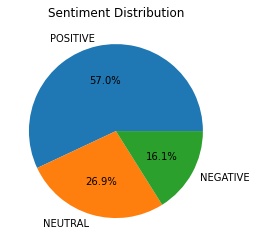

In [20]:
# Count the number of instances of each sentiment label
sentiment_counts = processed_df['sentiment_label'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%.1f%%')
plt.title("Sentiment Distribution")

# Display the chart
plt.show()

In [21]:
!pip install plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.graph_objects as go


In [23]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [24]:
sentiment_counts = processed_df['sentiment_label'].value_counts()
trace = go.Pie(labels=sentiment_counts.index, values=sentiment_counts, textinfo='percent')
layout = go.Layout(title="Sentiment Distribution - VADER")
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [27]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.graph_objects as go
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))
sentiment_counts = processed_df['sentiment_label'].value_counts()
trace = go.Pie(labels=sentiment_counts.index, values=sentiment_counts, textinfo='label+value+percent')
layout = go.Layout(title="Sentiment Distribution - VADER", width=500, height=500)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [26]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.graph_objects as go
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))
sentiment_counts = processed_df['sentiment_label'].value_counts()
trace = go.Pie(labels=sentiment_counts.index, values=sentiment_counts, textinfo='label+value+percent')
layout = go.Layout(title="Sentiment Distribution - VADER", width=500, height=500)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

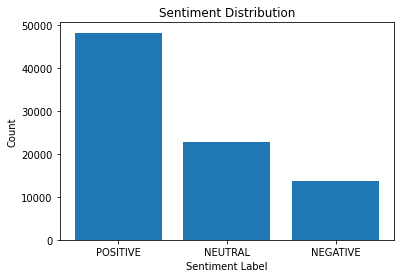

In [28]:
import matplotlib.pyplot as plt

# Create a new DataFrame with the count of each sentiment label
sentiment_count = processed_df['sentiment_label'].value_counts().reset_index()
sentiment_count.columns = ['sentiment_label', 'count']

# Create the bar chart
plt.bar(sentiment_count['sentiment_label'], sentiment_count['count'])
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [29]:
# processed_df = processed_df.drop(index=23375)

# Convert date column to datetime format
for i, date_value in enumerate(processed_df['date']):
    try:
        pd.to_datetime(date_value)
    except ValueError:
        print("Error in row with index:", i)
        # print(processed_df[i:i+1])

processed_df['date'] = pd.to_datetime(processed_df['date'])

# processed_df['date'] = pd.to_datetime(processed_df['date'], errors = 'raise')

# Remove the timezone offset
# processed_df['date'] = processed_df['date'].dt.tz_localize(None)

# Iterate over the DataFrame
for i, row in processed_df.iterrows():
    try:
        processed_df['date'] = processed_df['date'].dt.tz_convert('UTC')
    except AttributeError as e:
        print(f"Error in row {i}: {row['date']}")

# Extract date only
processed_df['date'] = processed_df['date'].dt.date
processed_df['date'].unique

<bound method Series.unique of 0        2022-12-18
1        2022-12-18
2        2022-12-18
3        2022-12-18
4        2022-12-18
            ...    
84563    2022-12-05
84564    2022-12-05
84565    2022-12-05
84566    2022-12-05
84567    2022-12-05
Name: date, Length: 84568, dtype: object>

In [30]:
processed_df.to_csv("/content/drive/MyDrive/Geetansh/Data Literacy/sentiment-ChatGPT/data/processed_data_vader_withDate.csv", index=False)

In [35]:
processed_df = pd.read_csv("/content/drive/MyDrive/Geetansh/Data Literacy/sentiment-ChatGPT/data/processed_data_vader_withDate.csv", low_memory=False)

In [36]:
# # processed_df = processed_df.drop(index=23375)

# # Convert date column to datetime format
# for i, date_value in enumerate(processed_df['date']):
#     try:
#         pd.to_datetime(date_value)
#     except ValueError:
#         print("Error in row with index:", i)

# processed_df['date'] = pd.to_datetime(processed_df['date'], errors = 'raise')

# # Remove the timezone offset
# processed_df['date'] = processed_df['date'].dt.tz_localize(None)

# # Extract date only
# processed_df['date'] = processed_df['date'].dt.date
# processed_df['date'].unique

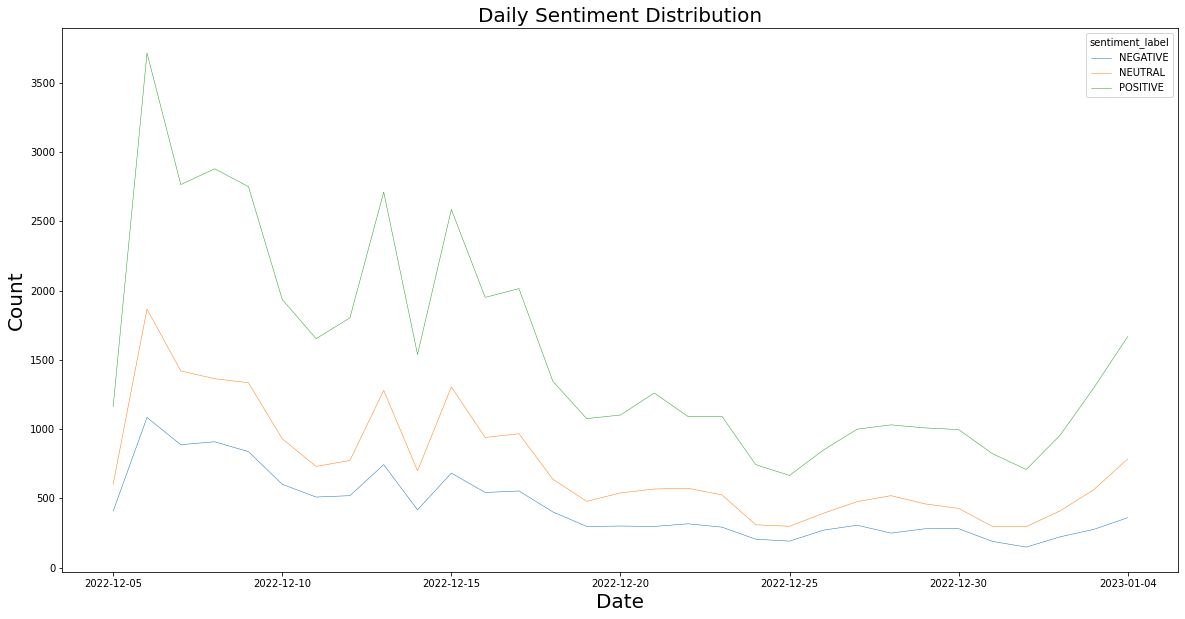

In [37]:
daily_sentiment = processed_df.groupby(['date','sentiment_label']).size().reset_index(name='counts')

# Use pivot_table to reshape the DataFrame 
daily_sentiment = daily_sentiment.pivot(index='date',columns='sentiment_label',values='counts')

# Fill missing values with 0
daily_sentiment = daily_sentiment.fillna(0)

# Create a new figure and subplots
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the daily sentiment distribution
daily_sentiment.plot(kind='line',ax=ax,linewidth=0.5)
plt.title("Daily Sentiment Distribution",fontsize=20)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

In [38]:
processed_df.keys()

Index(['user_name', 'text', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'hashtags', 'source', 'processed_text',
       'sentiment_label', 'sentiment_score'],
      dtype='object')

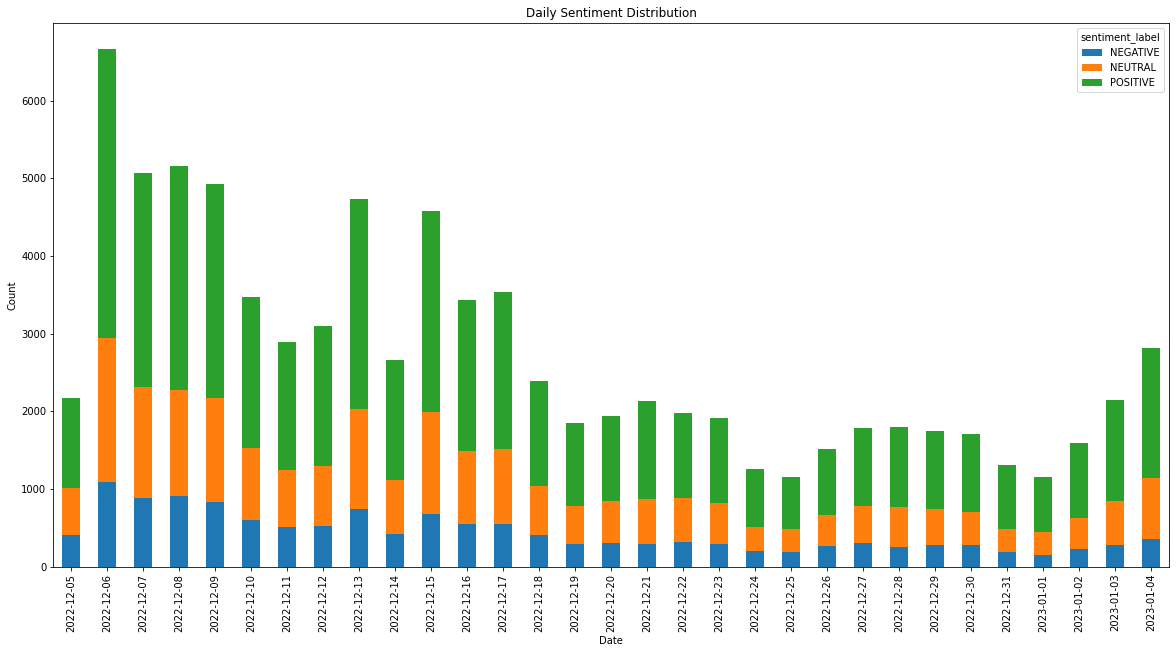

In [39]:
# Create a new DataFrame with the count of each sentiment label for each day
daily_sentiment = processed_df.groupby(['date','sentiment_label']).size().reset_index(name='counts')

# Use pivot_table to reshape the DataFrame 
daily_sentiment = daily_sentiment.pivot(index='date',columns='sentiment_label',values='counts')

# Plot the daily sentiment distribution
fig, ax = plt.subplots(figsize=(20,10))

daily_sentiment.plot(kind='bar', stacked=True, ax=ax)
plt.title("Daily Sentiment Distribution")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

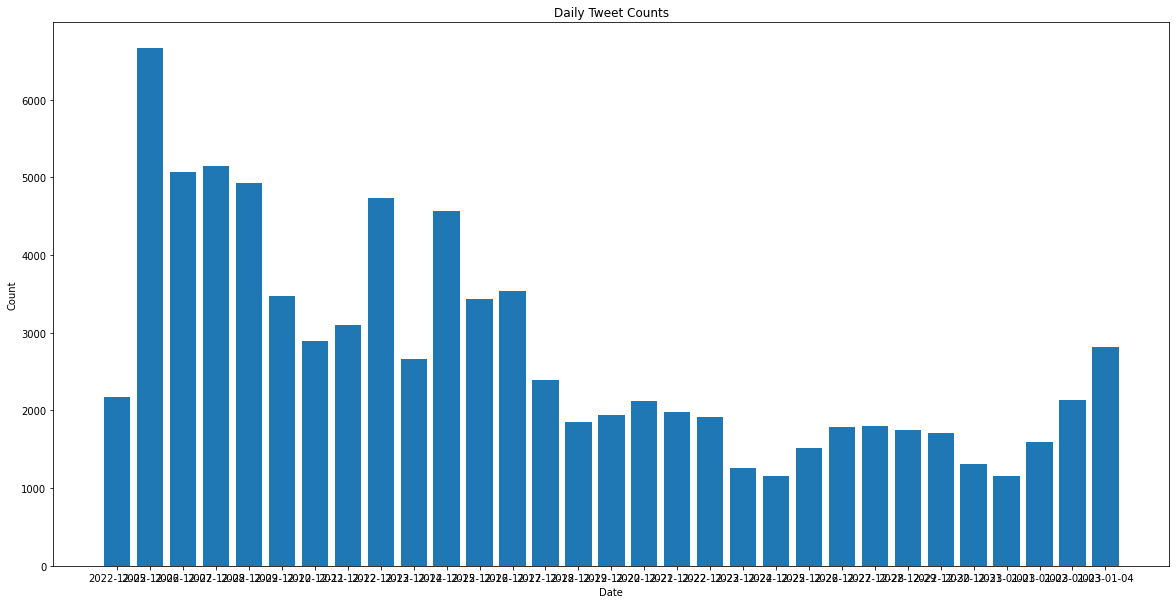

In [40]:
# Count the number of tweets for each day
daily_tweets = processed_df.groupby(['date']).size().reset_index(name='counts')

# Plot the daily tweet counts
plt.figure(figsize=(20,10))

plt.bar(daily_tweets['date'], daily_tweets['counts'])
plt.title("Daily Tweet Counts")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [42]:
import plotly.graph_objects as go
from datetime import datetime

# Create a new DataFrame with the count of each sentiment label for each day
daily_sentiment = processed_df.groupby(['date','sentiment_label']).size().reset_index(name='counts')

# Use pivot_table to reshape the DataFrame 
daily_sentiment = daily_sentiment.pivot(index='date',columns='sentiment_label',values='counts')

# Get list of dates and formatted date strings for tickvals and ticktext
dates = daily_sentiment.index.tolist()
datetime_dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
formatted_dates = [d.strftime("%Y-%m-%d") for d in datetime_dates]

# Plot the daily sentiment distribution
data = []
for col in daily_sentiment.columns:
    data.append(go.Bar(x=daily_sentiment.index, y=daily_sentiment[col], name=col))

layout = go.Layout(title="Daily Sentiment Distribution - VADER",
                   xaxis=dict(tickmode='array', tickvals=datetime_dates, ticktext=formatted_dates),
                   yaxis=dict(title='Count'),
                  )
fig = go.Figure(data=data, layout=layout)
fig.show()


In [ ]:
import math

In [ ]:
for i, value in enumerate(processed_df['processed_text']):
    if isinstance(value, float) and math.isnan(value):
        processed_df.at[i, 'processed_text'] = ""

In [ ]:
processed_df['processed_text'] = processed_df['processed_text'].apply(lambda x: x.replace('chatgpt',''))
processed_text = [word for word in processed_df['processed_text'] if word.isalnum() and len(word) > 1]

processed_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text,sentiment_label,sentiment_score
0,InvestWithJo,Using #ChatGPT To Generate AI NFTs and Make Profit!🚀 #ai #openai #chatgpt #ChatGPT #crypto #polygon #solana #bitcoin #dogecoin #sbf #ftx #BONK #BONKtoTheMoon https://t.co/iGZ4S6iYUN,"Los Angeles, CA",Daily Crypto & Finance Tips!🚀 $DEFI $DOT $MATIC $AVAX $XRP $HBAR Find me on Youtube: investwithjo 📺 https://t.co/NbH9BXrLnQ,2021-05-15 02:49:23+00:00,118,496,5072,FALSE,2023-01-06,"['ChatGPT', 'ai', 'openai', 'chatgpt', 'ChatGPT', 'crypto', 'polygon', 'solana']",Twitter for iPhone,"['using', '', 'generate', 'ai', 'nfts', 'make', 'profit', 'ai', 'openai', '', '', 'crypto', 'polygon', 'solana', 'bitcoin', 'dogecoin', 'sbf', 'ftx', 'bonk', 'bonktothemoon']",Positive,0.4926
1,Jiri,ChatGPT is currently revolutionizing many industries 🚀 #ChatGPT #ai https://t.co/b77Dx8pp8r,"Prague, Czech Republic",visual storyteller 🪐,2010-04-11 14:48:13+00:00,681,432,2969,FALSE,2023-01-06,"['ChatGPT', 'ai']",Twitter for iPhone,"['', 'currently', 'revolutionizing', 'many', 'industries', '', 'ai']",Neutral,0.0000
2,Ryan Polsley,Halo gamertags inbound. Thank you @OpenAI #ChatGPT https://t.co/xnp9lpQd91,NaN,"Airline pilot and husband, I post about Tesla & Halo CE and sometimes chess",2022-04-26 07:44:53+00:00,7,55,1642,FALSE,2023-01-06,['ChatGPT'],Twitter for iPhone,"['halo', 'gamertags', 'inbound', 'thank', '']",Positive,0.3612
3,Dharnik Shah,"So, it's safe to say- ChatGPT will pass references and not eat up the Accountant's job. Phew! #ChatGPT https://t.co/HT4ju4EC2K","Hyderabad, India",Chartered Accountant | Amateur Entrepreneur | Sustainable Packaging Enthusiast | Gooner,2012-08-27 09:42:19+00:00,25,344,703,FALSE,2023-01-06,['ChatGPT'],Twitter Web App,"['safe', 'say', '', 'pass', 'references', 'not', 'eat', 'accountants', 'job', 'phew', '']",Positive,0.4926
4,Clara B. Jones,"“If #ChatGPT or some other product ever became a real threat,” said Lemoine, “[@GoogleAI would] just bite the bullet and release #LaMDA, which would smoke ChatGPT.” @BigTechnology @Kantrowitz","Silver Spring, MD 20910, USA",Social Biology: Major Transitions Approach; Thermal Biology ... cf. Schmid-Hempel P 1990 Am Nat 135(4) ... Photo: Naked Mole Rats @moleratsarego Chris Faulkes,2011-03-21 01:16:26+00:00,200,0,7390,FALSE,2023-01-06,['ChatGPT'],Twitter Web App,"['', 'product', 'ever', 'became', 'real', 'threat', 'said', 'lemoine', 'would', 'bite', 'bullet', 'release', 'lamda', 'would', 'smoke', '']",Neutral,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74775,(I)(AM)(T)(MOYO),"Levels🙏🙏🙏,so happy for the chatGPT team for com8ng up with such a revolutionary idea.The FUTURE LOOKS BRIGHT.\n\n#ChatGPT https://t.co/1QOKv6YLwA",Satoshi Island,Blockchain Enthusiast || Philanthropist || a SLAVE OF JAVASCRIPT and SOLIDITY 💥 Blockchain and web developer||\nFx and stock trader||\n\nA KINGDOM CITIZEN,2013-12-07 16:38:30+00:00,3419,4994,16659,False,2022-12-05,NaN,Twitter for Android,"['levelsso', 'happy', '', 'team', 'com8ng', 'revolutionary', 'ideathe', 'future', 'looks', 'bright', '']",Positive,0.8091
74776,Green,"Iterating back-and-forth with tools like #ChatGPT will probably change how we use computers forever. Here's a ""conversation"" I had earlier as an example designing a simple video game UI. https://t.co/ZUTLcCLScS",🍁,NaN,2022-12-03 12:49:13+00:00,3,33,3,False,2022-12-05,['ChatGPT'],Twitter Web App,"['iterating', 'backandforth', 'tools', 'like', '', 'probably', 'change', 'use', 'computers', 'forever', 'heres', 'conversation', 'earlier', 'example', 'designing', 'simple', 'video', 'game', 'ui']",Positive,0.3612
74777,Gabriel Furstenheim,Russel vs ChatGPT. It's also funny that it takes a long time to answer\n#ChatGPT https://t.co/2YkR0fRVCT,NaN,Mathematician and Developer @Amazon. Previously @Geoblink,2016-07-09 21:08:52+00:00,80,34,169,False,2022-12-05,['ChatGPT'],Tw

In [ ]:
import numpy as np

In [ ]:
# Group the tweets by date
date_group = processed_df.groupby(['date','sentiment_label']).size().reset_index(name='counts')
date_sentiment = pd.pivot_table(date_group, values='counts', index=['date'], columns=['sentiment_label'], aggfunc=np.sum, fill_value=0)
date_sentiment = date_sentiment.div(date_sentiment.sum(axis=1), axis=0)*100



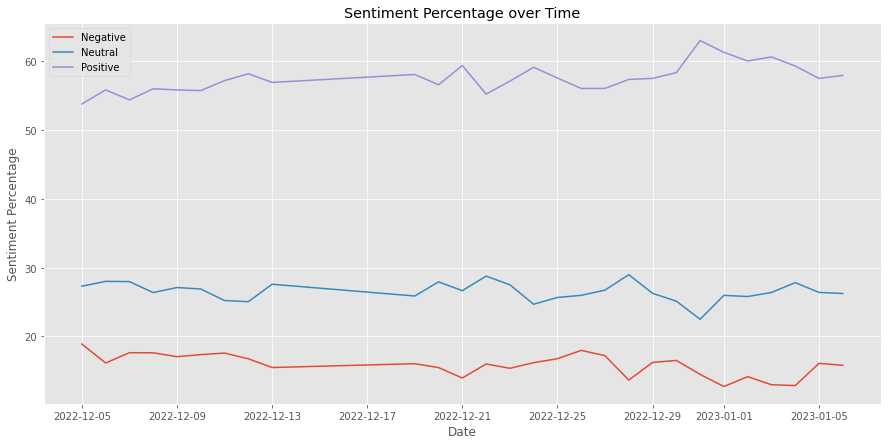

In [ ]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,7))
for sentiment in date_sentiment.columns:
    plt.plot(date_sentiment.index, date_sentiment[sentiment], label=sentiment)
plt.xlabel('Date')
plt.ylabel('Sentiment Percentage')
plt.title('Sentiment Percentage over Time')
plt.legend()
plt.show()


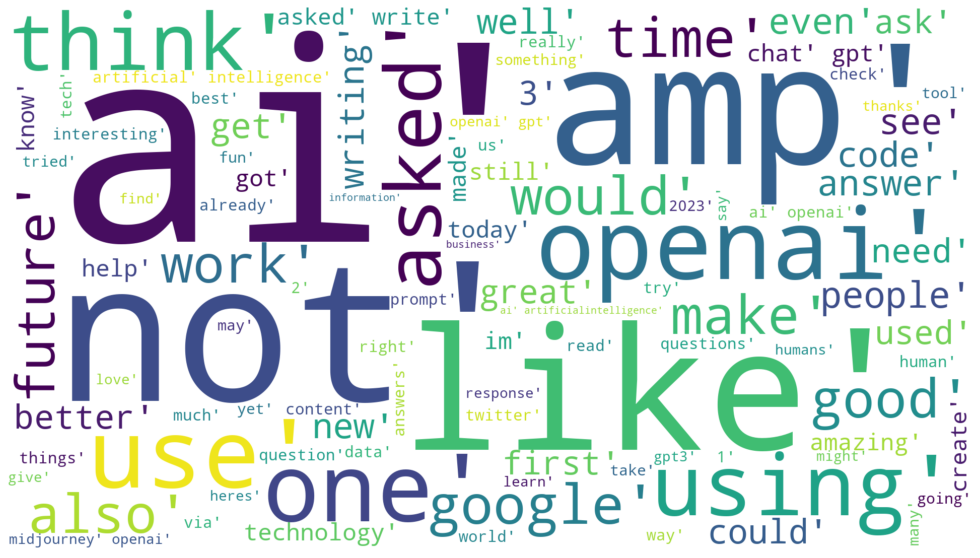

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create a string of all the words in the 'processed_text' column
text = " ".join(review for review in processed_df.processed_text)

# Create a word cloud with the text and set the background color to white
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=100, width=1920, height=1080, contour_width=3, contour_color='steelblue').generate(text)

# Display the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

['using', 'generate', 'ai', 'nfts', 'make', 'profit', 'ai', 'openai', 'crypto', 'polygon', 'solana', 'bitcoin', 'dogecoin', 'sbf', 'ftx', 'bonk', 'bonktothemoon', 'currently', 'revolutionizing', 'many']


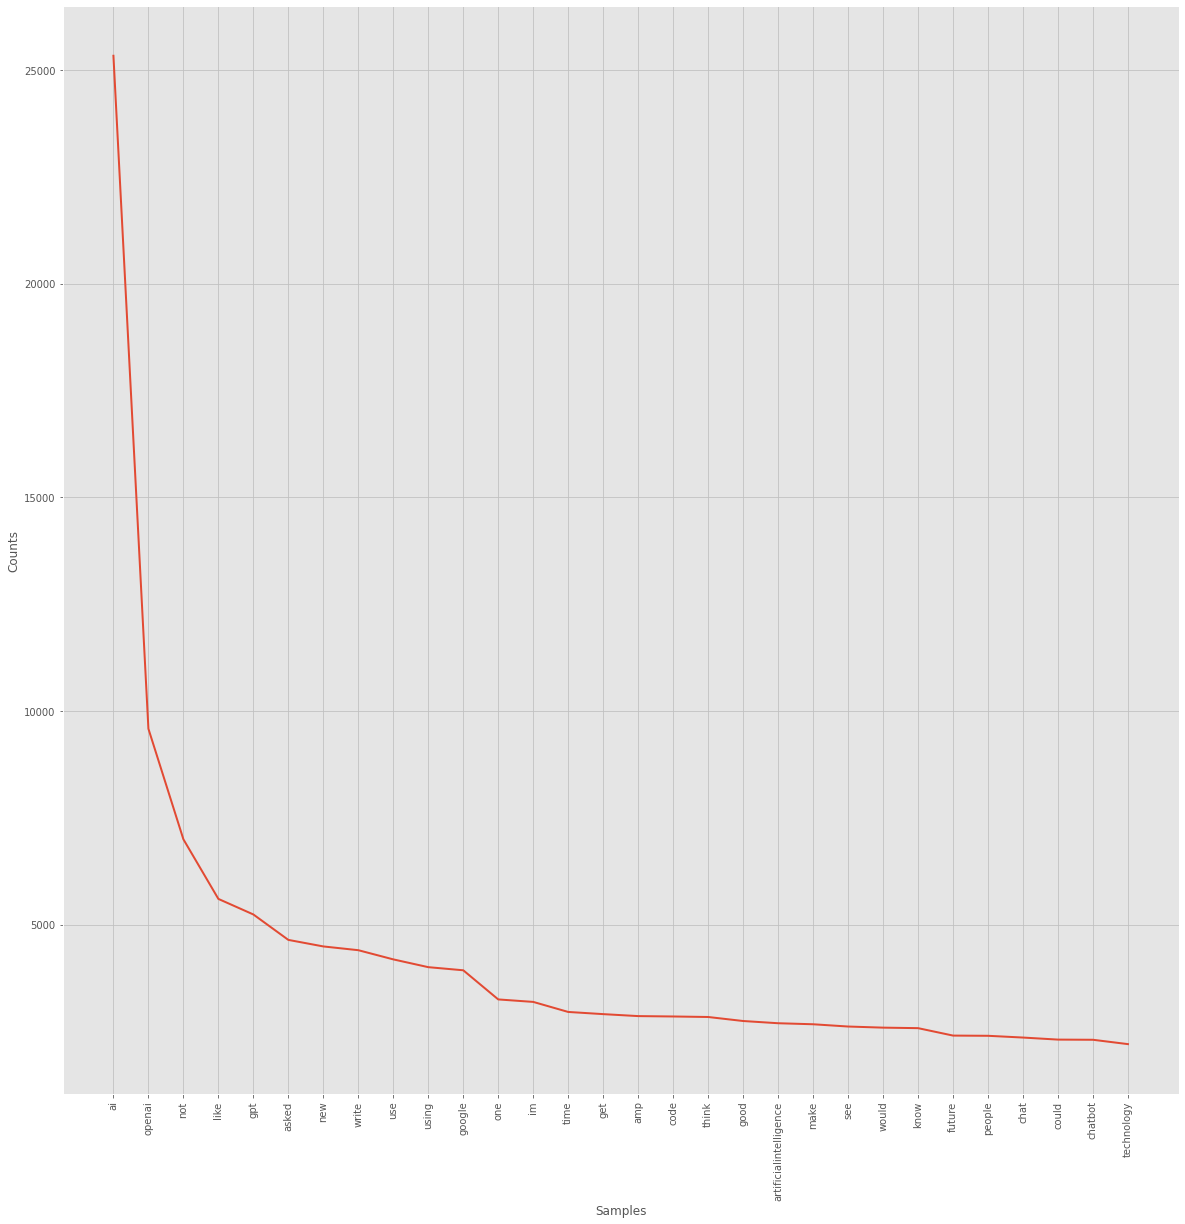

In [ ]:
from nltk.probability import FreqDist
import re

# Join all the text in processed_df['processed_text']
all_text = " ".join(text for text in processed_df['processed_text'])
all_text = re.sub("[^a-zA-Z]", " ", all_text)
all_text = all_text.lower()

# Tokenize the text
tokens = nltk.word_tokenize(all_text)
print(tokens[0:20])

# Generate the frequency distribution
fdist = FreqDist(tokens)

# Plot the frequency distribution
plt.figure(figsize=(20, 20))
fdist.plot(30, cumulative=False)
plt.show()


In [ ]:
positive_df = processed_df[processed_df['sentiment_label'] == 'Positive']
positive_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text,sentiment_label,sentiment_score,user_description_processed
0,InvestWithJo,Using #ChatGPT To Generate AI NFTs and Make Profit!🚀 #ai #openai #chatgpt #ChatGPT #crypto #polygon #solana #bitcoin #dogecoin #sbf #ftx #BONK #BONKtoTheMoon https://t.co/iGZ4S6iYUN,"Los Angeles, CA",Daily Crypto & Finance Tips!🚀 $DEFI $DOT $MATIC $AVAX $XRP $HBAR Find me on Youtube: investwithjo 📺 https://t.co/NbH9BXrLnQ,2021-05-15 02:49:23+00:00,118,496,5072,FALSE,2023-01-06,"['ChatGPT', 'ai', 'openai', 'chatgpt', 'ChatGPT', 'crypto', 'polygon', 'solana']",Twitter for iPhone,"['using', '', 'generate', 'ai', 'nfts', 'make', 'profit', 'ai', 'openai', '', '', 'crypto', 'polygon', 'solana', 'bitcoin', 'dogecoin', 'sbf', 'ftx', 'bonk', 'bonktothemoon']",Positive,0.4926,"[daily, crypto, finance, tips, defi, dot, matic, avax, xrp, hbar, find, me, on, youtube, investwithjo]"
2,Ryan Polsley,Halo gamertags inbound. Thank you @OpenAI #ChatGPT https://t.co/xnp9lpQd91,NaN,"Airline pilot and husband, I post about Tesla & Halo CE and sometimes chess",2022-04-26 07:44:53+00:00,7,55,1642,FALSE,2023-01-06,['ChatGPT'],Twitter for iPhone,"['halo', 'gamertags', 'inbound', 'thank', '']",Positive,0.3612,"[airline, pilot, and, husband, i, post, about, tesla, halo, ce, and, sometimes, chess]"
3,Dharnik Shah,"So, it's safe to say- ChatGPT will pass references and not eat up the Accountant's job. Phew! #ChatGPT https://t.co/HT4ju4EC2K","Hyderabad, India",Chartered Accountant | Amateur Entrepreneur | Sustainable Packaging Enthusiast | Gooner,2012-08-27 09:42:19+00:00,25,344,703,FALSE,2023-01-06,['ChatGPT'],Twitter Web App,"['safe', 'say', '', 'pass', 'references', 'not', 'eat', 'accountants', 'job', 'phew', '']",Positive,0.4926,"[chartered, accountant, amateur, entrepreneur, sustainable, packaging, enthusiast, gooner]"
5,SEO Consultant,I know there's tons of blogs about the awesome #SEO benefits of using #ChatGPT but this one definitely has some new/unique tips.\n\nCheck it out: https://t.co/1WrjJTdJff,"San Francisco, CA",SEO Consultant @localseoguide 🤩 Board Member @baysearch 😎 I love breaking and fixing websites 🥳,2013-11-17 22:43:57+00:00,1780,2119,4692,FALSE,2023-01-06,"['SEO', 'ChatGPT']",Twitter Web App,"['know', 'theres', 'tons', 'blogs', 'awesome', 'seo', 'benefits', 'using', '', 'one', 'definitely', 'newunique', 'tips', 'check']",Positive,0.7845,"[seo, consultant, localseoguide, board, member, baysearch, i, love, breaking, and, fixing, websites]"
9,Samarth Gupta,"Want to learn more about how to monetize ChatGPT and maximize your earnings? Retweet this thread or like it to get a free PDF on ""The Ultimate Guide to Monetizing ChatGPT: 10 Proven Strategies""! \n\n#ChatGPT #monetization #freePDF","Washington, DC",Entrepreneur | AI/ML enthusiast | Biz Strategy | Real-estate | Crypto \n #startups,2009-04-25 02:38:41+00:00,48,610,1200,FALSE,2023-01-06,NaN,Twitter Web App,"['want', 'learn', 'monetize', '', 'maximize', 'earnings', 'retweet', 'thread', 'like', 'get', 'free', 'pdf', 'ultimate', 'guide', 'monetizing', '', '10', 'proven', 'strategies', '', 'monetization', 'freepdf']",Positive,0.7500,"[entrepreneur, aiml, enthusiast, biz, strategy, realestate, crypto, startups]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74774,Nenu,"ChatGPT is the biggest, smartest brain 🧠 in the world right now. #ChatGPT",NaN,"Your brain is not meant for processing millions of tweets, posts and videos. Don't torture it. It is meant for doing things that make you truly happy & content",2022-08-30 14:33:29+00:00,6,87,738,False,2022-12-05,['ChatGPT'],Twitter Web App,"['', 'biggest', 'smartest', 'brain', 'world', 'right', '']",Positive,0.6124,"[your, brain, is, not, meant, for, processing, millions, of, tweets, posts, and, videos, dont, torture, it, it, is, meant, for, doing, things, that, make, you, truly, happy, content]"
7477

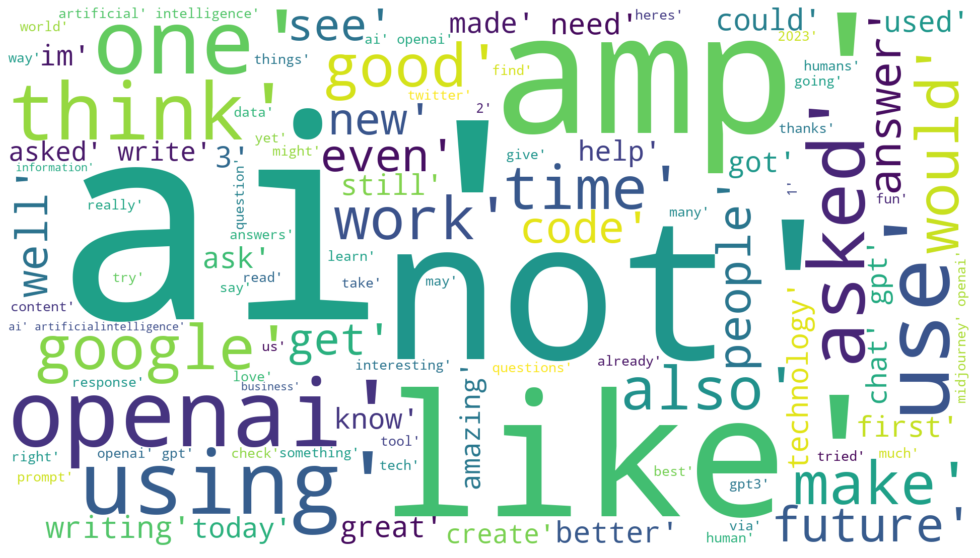

In [ ]:

positive_words = " ".join(review for review in positive_df["processed_text"])

# Create a string of all the words in the 'processed_text' column
text = " ".join(review for review in processed_df.processed_text)

# Create a word cloud with the text and set the background color to white
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=100, width=1920, height=1080, contour_width=3, contour_color='steelblue').generate(text)

# Display the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

['using', 'generate', 'ai', 'nfts', 'make', 'profit', 'ai', 'openai', 'crypto', 'polygon', 'solana', 'bitcoin', 'dogecoin', 'sbf', 'ftx', 'bonk', 'bonktothemoon', 'halo', 'gamertags', 'inbound']


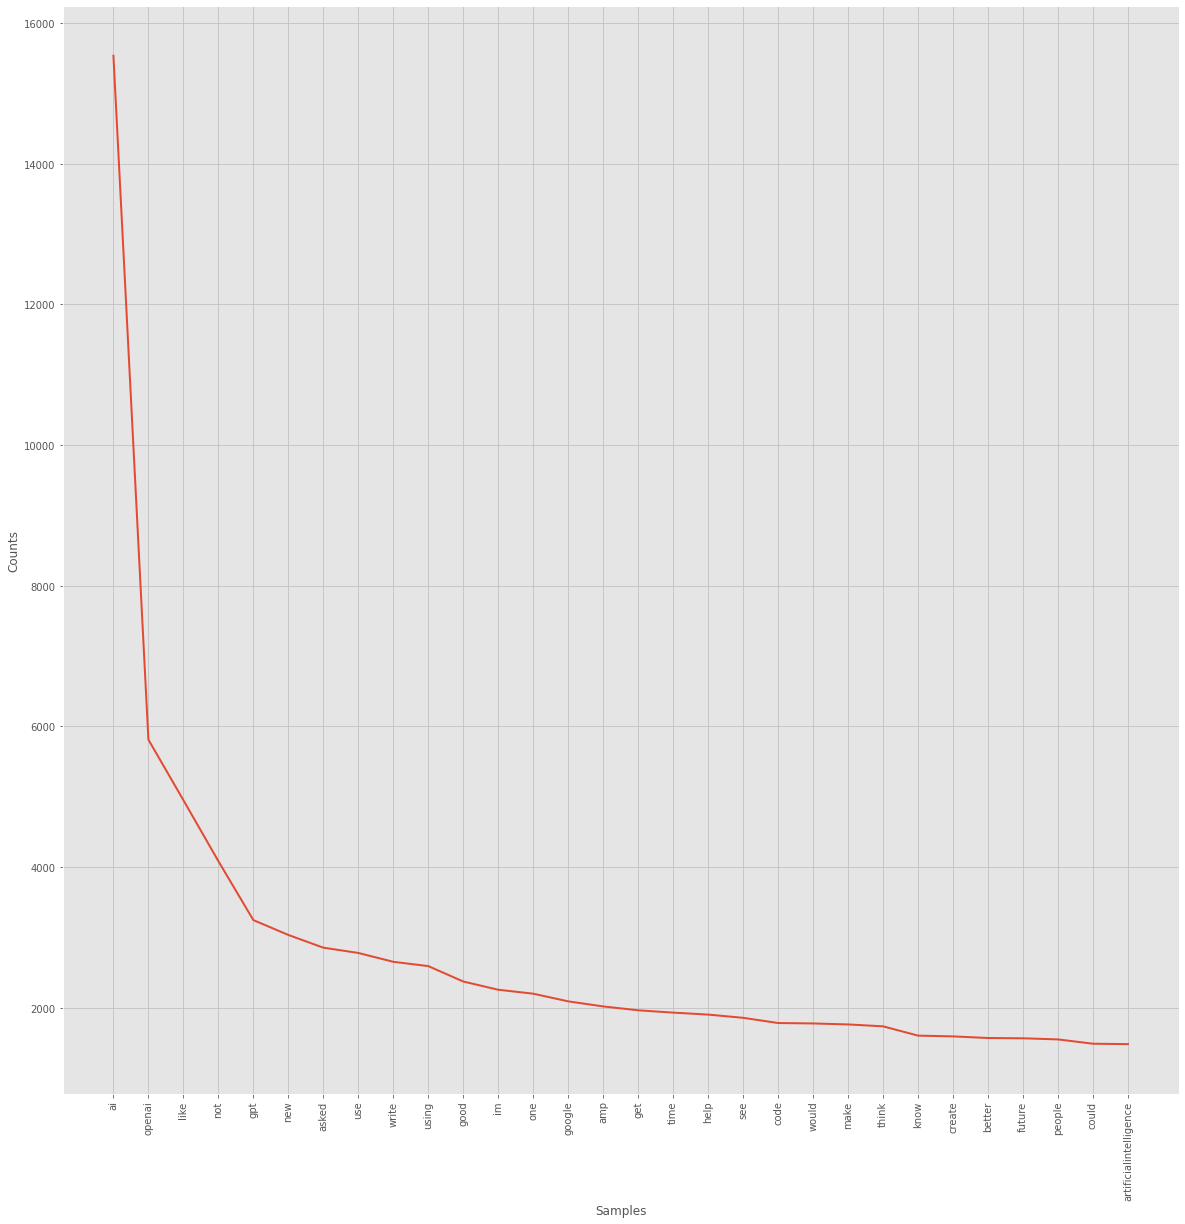

In [ ]:
# Join all the text
all_text = " ".join(text for text in positive_df['processed_text'])
all_text = re.sub("[^a-zA-Z]", " ", all_text)
all_text = all_text.lower()
# Tokenize the text
tokens = nltk.word_tokenize(all_text)
print(tokens[0:20])

# Generate the frequency distribution
fdist = FreqDist(tokens)

# Plot the frequency distribution
plt.figure(figsize=(20, 20))
fdist.plot(30, cumulative=False)
plt.show()


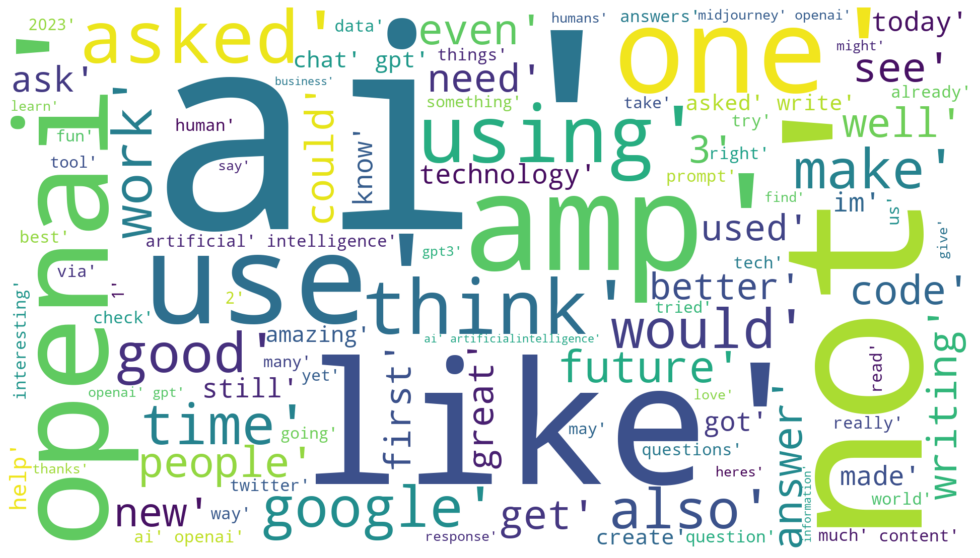

In [ ]:
negative_df = processed_df[processed_df['sentiment_label'] == 'Negative']
negative_words = " ".join(review for review in negative_df["processed_text"])

# Create a string of all the words in the 'processed_text' column
text = " ".join(review for review in processed_df.processed_text)

# Create a word cloud with the text and set the background color to white
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=100, width=1920, height=1080, contour_width=3, contour_color='steelblue').generate(text)

# Display the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

['basically', 'one', 'community', 'tolerate', 'everything', 'others', 'offensive', 'biased', 'beware', 'programmed', 'severe', 'political', 'bias', 'regarding', 'completely', 'ignores', 'data', 'conflicts', 'establishment', 'interests']


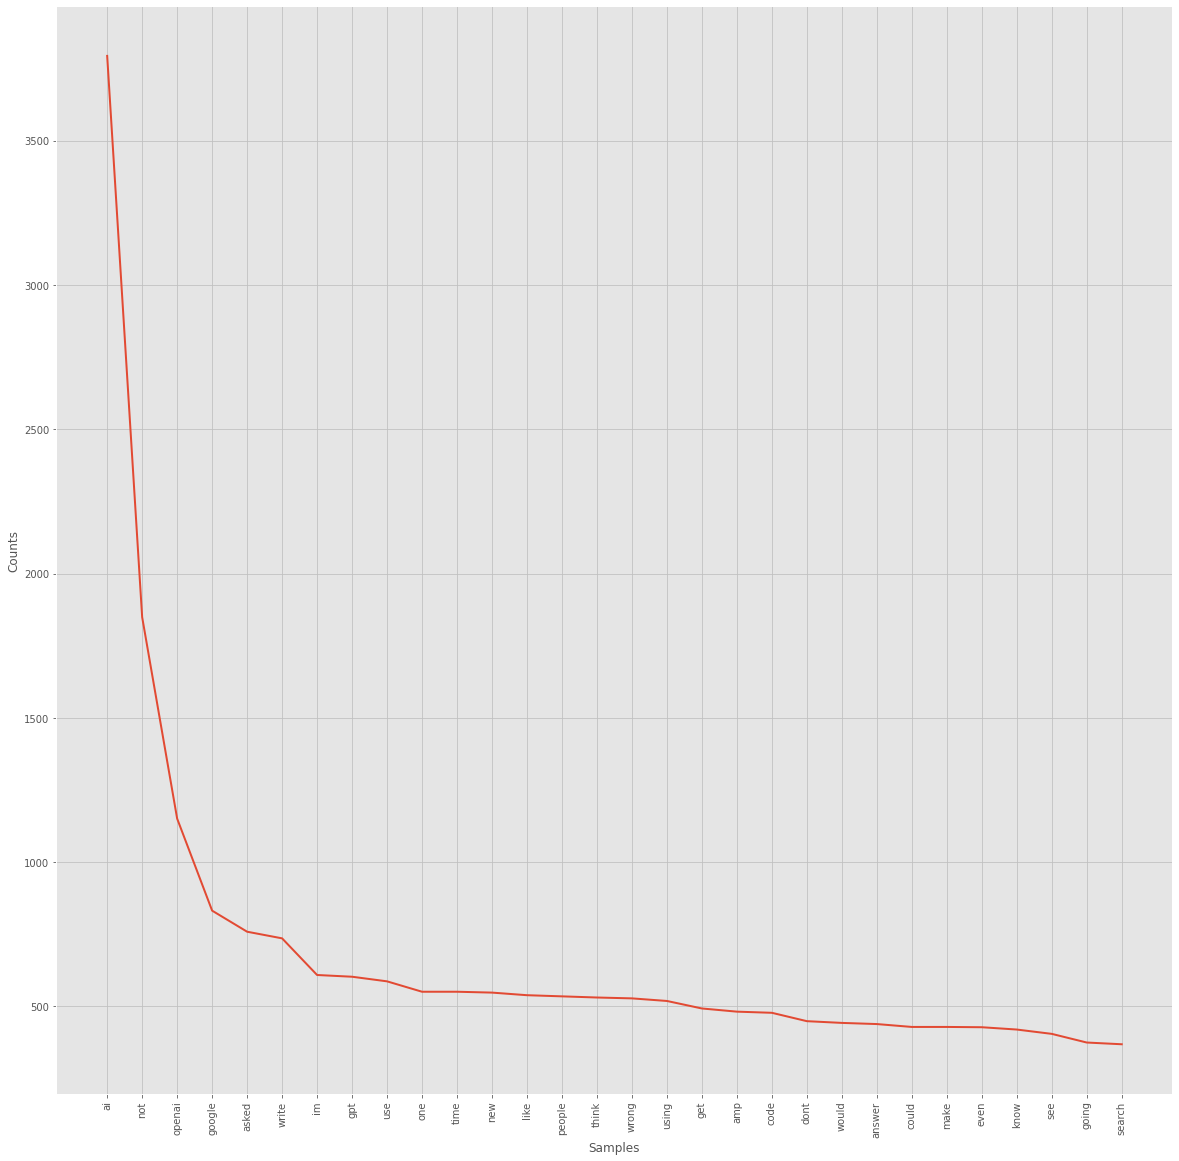

In [ ]:
# Join all the text
all_text = " ".join(text for text in negative_df['processed_text'])
all_text = re.sub("[^a-zA-Z]", " ", all_text)
all_text = all_text.lower()

# Tokenize the text
tokens = nltk.word_tokenize(all_text)
print(tokens[0:20])

# Generate the frequency distribution
fdist = FreqDist(tokens)

# Plot the frequency distribution
plt.figure(figsize=(20, 20))
fdist.plot(30, cumulative=False)
plt.show()

In [ ]:
tech_keywords = ["ai", "machine learning", "tech", "it", "i.t.", "computer","programmer", "coder", "techie", "machine learning", "machine learning engineer", "data scientist", "data analyst", "data engineer", "AI", "artificial intelligence", "deep learning", "neural networks", "computer vision", "natural language processing", "big data", "cloud computing", "software developer", "web", "developer", "front-end", "back-end", "full-stack", "python", "r", "java", "c++", "javascript", "sql", "algorithms", "devops", "linux", "git", "agile", "scrum", "intern", "google", "microsoft", "amazon", "facebook", "apple", "open source", "hackathon", "startup", "entrepreneur", "research", "ph.d.", "masters", "bachelor", "student", "engineer", "consultant", "analyst", "manager", "director", "lead", "senior", "junior", "summer of code", "github", "stack overflow", "kaggle", "coursera", "edx", "udemy", "codecademy", "khan academy", "mit opencourseware", "stanford online", "javascript", "python", "c++", "java", "php", "sql", "git", "linux", "windows", "mac", "devops", "agile", "scrum", "kanban", "software development", "full stack", "front-end", "back-end", "api", "data science", "big data", "data engineering", "data analyst", "data visualization", "neural networks", "deep learning", "computer vision", "natural language processing", "reinforcement", "learning", "computer science", "computer engineer", "software engineer", "programmer", "coder", "developer", "debugging", "code review", "algorithm", "data structure", "cloud computing", "aws", "azure", "google cloud", "ibm cloud", "oracle", "cloud", "open source", "docker", "kubernetes", "ai engineer", "machine learning engineer", "data engineer", "data scientist", "ai researcher"]

In [ ]:
processed_df['user_description']

0                                             Daily Crypto & Finance Tips!🚀 $DEFI $DOT $MATIC $AVAX $XRP $HBAR Find me on Youtube: investwithjo 📺 https://t.co/NbH9BXrLnQ
1                                                                                                                                                    visual storyteller 🪐
2                                                                                             Airline pilot and husband, I post about Tesla & Halo CE and sometimes chess
3                                                                                 Chartered Accountant | Amateur Entrepreneur | Sustainable Packaging Enthusiast | Gooner
4          Social Biology: Major Transitions Approach; Thermal Biology ... cf. Schmid-Hempel P 1990 Am Nat 135(4) ... Photo: Naked Mole Rats @moleratsarego Chris Faulkes
                                                                                       ...                                                            

In [ ]:
processed_df['user_description_processed'] = processed_df['user_description'].apply(lambda x: x if isinstance(x, str) else '')


In [ ]:
def preprocess_text(text):
    text = text.lower() # convert to lowercase
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove emojis and other symbols
    text = text.split() # break into tokens
    return text

processed_df['user_description_processed'] = processed_df['user_description_processed'].apply(preprocess_text)


In [ ]:
processed_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text,sentiment_label,sentiment_score,user_description_processed
0,InvestWithJo,Using #ChatGPT To Generate AI NFTs and Make Profit!🚀 #ai #openai #chatgpt #ChatGPT #crypto #polygon #solana #bitcoin #dogecoin #sbf #ftx #BONK #BONKtoTheMoon https://t.co/iGZ4S6iYUN,"Los Angeles, CA",Daily Crypto & Finance Tips!🚀 $DEFI $DOT $MATIC $AVAX $XRP $HBAR Find me on Youtube: investwithjo 📺 https://t.co/NbH9BXrLnQ,2021-05-15 02:49:23+00:00,118,496,5072,FALSE,2023-01-06,"['ChatGPT', 'ai', 'openai', 'chatgpt', 'ChatGPT', 'crypto', 'polygon', 'solana']",Twitter for iPhone,"['using', '', 'generate', 'ai', 'nfts', 'make', 'profit', 'ai', 'openai', '', '', 'crypto', 'polygon', 'solana', 'bitcoin', 'dogecoin', 'sbf', 'ftx', 'bonk', 'bonktothemoon']",Positive,0.4926,"[daily, crypto, finance, tips, defi, dot, matic, avax, xrp, hbar, find, me, on, youtube, investwithjo]"
1,Jiri,ChatGPT is currently revolutionizing many industries 🚀 #ChatGPT #ai https://t.co/b77Dx8pp8r,"Prague, Czech Republic",visual storyteller 🪐,2010-04-11 14:48:13+00:00,681,432,2969,FALSE,2023-01-06,"['ChatGPT', 'ai']",Twitter for iPhone,"['', 'currently', 'revolutionizing', 'many', 'industries', '', 'ai']",Neutral,0.0000,"[visual, storyteller]"
2,Ryan Polsley,Halo gamertags inbound. Thank you @OpenAI #ChatGPT https://t.co/xnp9lpQd91,NaN,"Airline pilot and husband, I post about Tesla & Halo CE and sometimes chess",2022-04-26 07:44:53+00:00,7,55,1642,FALSE,2023-01-06,['ChatGPT'],Twitter for iPhone,"['halo', 'gamertags', 'inbound', 'thank', '']",Positive,0.3612,"[airline, pilot, and, husband, i, post, about, tesla, halo, ce, and, sometimes, chess]"
3,Dharnik Shah,"So, it's safe to say- ChatGPT will pass references and not eat up the Accountant's job. Phew! #ChatGPT https://t.co/HT4ju4EC2K","Hyderabad, India",Chartered Accountant | Amateur Entrepreneur | Sustainable Packaging Enthusiast | Gooner,2012-08-27 09:42:19+00:00,25,344,703,FALSE,2023-01-06,['ChatGPT'],Twitter Web App,"['safe', 'say', '', 'pass', 'references', 'not', 'eat', 'accountants', 'job', 'phew', '']",Positive,0.4926,"[chartered, accountant, amateur, entrepreneur, sustainable, packaging, enthusiast, gooner]"
4,Clara B. Jones,"“If #ChatGPT or some other product ever became a real threat,” said Lemoine, “[@GoogleAI would] just bite the bullet and release #LaMDA, which would smoke ChatGPT.” @BigTechnology @Kantrowitz","Silver Spring, MD 20910, USA",Social Biology: Major Transitions Approach; Thermal Biology ... cf. Schmid-Hempel P 1990 Am Nat 135(4) ... Photo: Naked Mole Rats @moleratsarego Chris Faulkes,2011-03-21 01:16:26+00:00,200,0,7390,FALSE,2023-01-06,['ChatGPT'],Twitter Web App,"['', 'product', 'ever', 'became', 'real', 'threat', 'said', 'lemoine', 'would', 'bite', 'bullet', 'release', 'lamda', 'would', 'smoke', '']",Neutral,0.0000,"[social, biology, major, transitions, approach, thermal, biology, cf, schmidhempel, p, 1990, am, nat, 1354, photo, naked, mole, rats, moleratsarego, chris, faulkes]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74775,(I)(AM)(T)(MOYO),"Levels🙏🙏🙏,so happy for the chatGPT team for com8ng up with such a revolutionary idea.The FUTURE LOOKS BRIGHT.\n\n#ChatGPT https://t.co/1QOKv6YLwA",Satoshi Island,Blockchain Enthusiast || Philanthropist || a SLAVE OF JAVASCRIPT and SOLIDITY 💥 Blockchain and web developer||\nFx and stock trader||\n\nA KINGDOM CITIZEN,2013-12-07 16:38:30+00:00,3419,4994,16659,False,2022-12-05,NaN,Twitter for Android,"['levelsso', 'happy', '', 'team', 'com8ng', 'revolutionary', 'ideathe', 'future', 'looks', 'bright', '']",Positive,0.8091,"[blockchain, enthusiast, philanthropist, a, slave, of, javascript, and, solidity, blockchain, and, web, developer, fx, and, stock, trader, a, kingdom, citizen]"
74776,Green,"Iterating back-and-forth with tools like #ChatGPT will probably change how we use computers forever. H

In [ ]:
tech_df = processed_df[processed_df['user_description_processed'].apply(lambda x: any(word in x for word in tech_keywords))]


In [ ]:
tech_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text,sentiment_label,sentiment_score,user_description_processed
3,Dharnik Shah,"So, it's safe to say- ChatGPT will pass references and not eat up the Accountant's job. Phew! #ChatGPT https://t.co/HT4ju4EC2K","Hyderabad, India",Chartered Accountant | Amateur Entrepreneur | Sustainable Packaging Enthusiast | Gooner,2012-08-27 09:42:19+00:00,25,344,703,FALSE,2023-01-06,['ChatGPT'],Twitter Web App,"['safe', 'say', '', 'pass', 'references', 'not', 'eat', 'accountants', 'job', 'phew', '']",Positive,0.4926,"[chartered, accountant, amateur, entrepreneur, sustainable, packaging, enthusiast, gooner]"
5,SEO Consultant,I know there's tons of blogs about the awesome #SEO benefits of using #ChatGPT but this one definitely has some new/unique tips.\n\nCheck it out: https://t.co/1WrjJTdJff,"San Francisco, CA",SEO Consultant @localseoguide 🤩 Board Member @baysearch 😎 I love breaking and fixing websites 🥳,2013-11-17 22:43:57+00:00,1780,2119,4692,FALSE,2023-01-06,"['SEO', 'ChatGPT']",Twitter Web App,"['know', 'theres', 'tons', 'blogs', 'awesome', 'seo', 'benefits', 'using', '', 'one', 'definitely', 'newunique', 'tips', 'check']",Positive,0.7845,"[seo, consultant, localseoguide, board, member, baysearch, i, love, breaking, and, fixing, websites]"
7,Code Gears 👨‍💻 ⚙️,And here the #chatGPT answer and explanation:,"Eibertingen, Belgium","Transforming Coffee and Tears into Code! \nApple enthusiast, Dev grunt, 3D Print beginner, … \nAlways searching for solutions and new challenges!",2013-10-17 15:52:59+00:00,534,462,325,FALSE,2023-01-06,['chatGPT'],Hypefury,"['', 'answer', 'explanation']",Neutral,0.0000,"[transforming, coffee, and, tears, into, code, apple, enthusiast, dev, grunt, 3d, print, beginner, always, searching, for, solutions, and, new, challenges]"
8,Ivan,I can't believe how versatile ChatGPT has been for me! 🤯\n\nI've been using it for a variety of tasks and it has consistently exceeded my expectations.\n\n #ChatGPT #AI #assistant,Italia,Indie app developer. 🏳️‍🌈 Building https://t.co/vtDoorPIAj / https://t.co/n45giN5ucY / https://t.co/oeyZhj3NwN with .NET,2011-01-01 20:50:13+00:00,474,368,4027,FALSE,2023-01-06,NaN,Twitter for iPhone,"['cant', 'believe', 'versatile', '', 'ive', 'using', 'variety', 'tasks', 'consistently', 'exceeded', 'expectations', '', 'ai', 'assistant']",Neutral,0.0000,"[indie, app, developer, building, with, net]"
9,Samarth Gupta,"Want to learn more about how to monetize ChatGPT and maximize your earnings? Retweet this thread or like it to get a free PDF on ""The Ultimate Guide to Monetizing ChatGPT: 10 Proven Strategies""! \n\n#ChatGPT #monetization #freePDF","Washington, DC",Entrepreneur | AI/ML enthusiast | Biz Strategy | Real-estate | Crypto \n #startups,2009-04-25 02:38:41+00:00,48,610,1200,FALSE,2023-01-06,NaN,Twitter Web App,"['want', 'learn', 'monetize', '', 'maximize', 'earnings', 'retweet', 'thread', 'like', 'get', 'free', 'pdf', 'ultimate', 'guide', 'monetizing', '', '10', 'proven', 'strategies', '', 'monetization', 'freepdf']",Positive,0.7500,"[entrepreneur, aiml, enthusiast, biz, strategy, realestate, crypto, startups]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74773,Nick Perkins • Hebrews 13:8 • Development Manager,Ok now @OpenAI is just showing off. lol #ChatGPT https://t.co/GKAixEF7zb,"Raleigh, North Carolina, USA","A proud Dad of 3, husband, Dev manager, iOS eng., teacher, परदेशी/老外, Duke fan, storyteller, @thefoodgenieapp creator, seeking to be Deaf culturally competent",2013-12-04 17:12:00+00:00,164,326,6317,False,2022-12-05,['ChatGPT'],Twitter Web App,"['ok', 'showing', 'lol', '']",Positive,0.6124,"[a, proud, dad, of, 3, husband, dev, manager, ios, eng, teacher, duke, fan, storyteller, thefoodgenieapp, creator, seeking, to, be, deaf, culturally, competent]"
74774,Nenu,"ChatGPT is the biggest, smartest brain 🧠 in the world right 

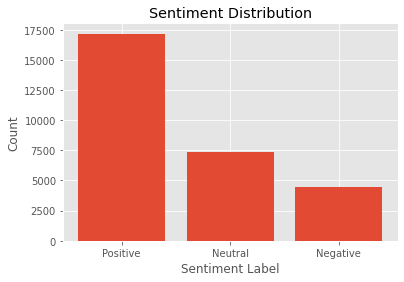

In [ ]:
# Create a new DataFrame with the count of each sentiment label
sentiment_count = tech_df['sentiment_label'].value_counts().reset_index()
sentiment_count.columns = ['sentiment_label', 'count']

# Create the bar chart
plt.bar(sentiment_count['sentiment_label'], sentiment_count['count'])
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

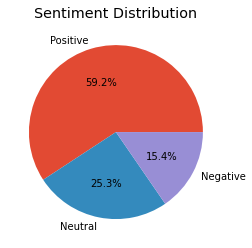

In [ ]:
sentiment_counts = tech_df['sentiment_label'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%.1f%%')
plt.title("Sentiment Distribution")

# Display the chart
plt.show()

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.9691979610000203
GPU (s):
0.03865682800000059
GPU speedup over CPU: 102x
